In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

from scipy import stats

In [4]:
data_dir =  '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data3/'
version = '1'

posteriors = {}
density = {}
for field in ['DDF', 'WFD']:
    
    density[field] = {}
    posteriors[field] = {}
    
    for size in [1500, 3000, 6000]:
        
        posteriors[field][size] = {}
        posteriors[field][size]['fiducial'] = pd.read_csv(data_dir + field + \
                                                '/results/v' + version + '/' + str(size) + '/posteriors/csv/chains_fiducial' + \
                                                          str(size) + '_lowz_withbias.csv.gz')
        posteriors[field][size]['random'] = pd.read_csv(data_dir + field + \
                                                '/results/v' + version + '/' + str(size) + '/posteriors/csv/chains_random' + \
                                                        str(size) + '_lowz_withbias.csv.gz')
        posteriors[field][size]['perfect'] = pd.read_csv(data_dir + field + \
                                                '/results/v' + version + '/' + str(size) + '/posteriors/csv/chains_perfect' + \
                                                         str(size) + '_lowz_withbias.csv.gz')
    
        density[field][size] = {}
        density[field][size]['fiducial'] = stats.kde.gaussian_kde(posteriors[field][size]['fiducial']['w'], bw_method=0.3)
        density[field][size]['random'] = stats.kde.gaussian_kde(posteriors[field][size]['random']['w'], bw_method=0.3)
        density[field][size]['perfect'] = stats.kde.gaussian_kde(posteriors[field][size]['perfect']['w'], bw_method=0.3)

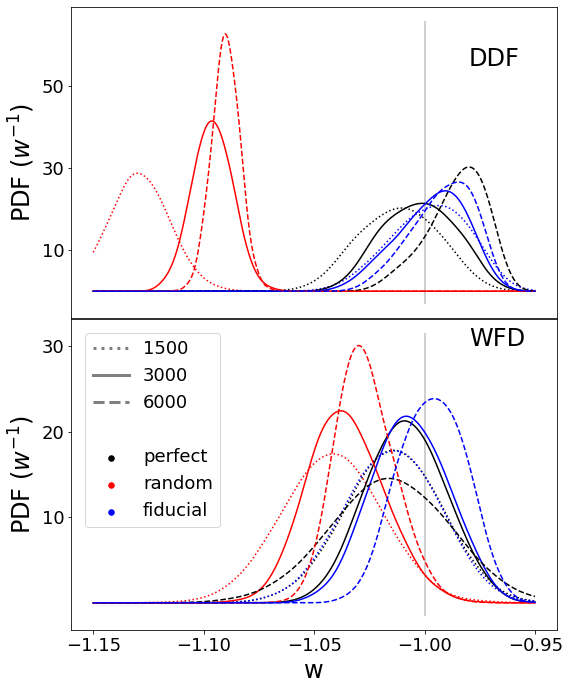

In [5]:
x = np.arange(-1.15, -0.95, .0001)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,1,1)

plt.plot(x, density['DDF'][1500]['perfect'](x), color='black', ls=':')
plt.plot(x, density['DDF'][1500]['random'](x), color='red', ls=':')
plt.plot(x, density['DDF'][1500]['fiducial'](x), color='blue', ls=':')

plt.plot(x, density['DDF'][3000]['perfect'](x), color='black')
plt.plot(x, density['DDF'][3000]['random'](x), color='red')
plt.plot(x, density['DDF'][3000]['fiducial'](x), color='blue')

plt.plot(x, density['DDF'][6000]['perfect'](x), color='black', ls='--')
plt.plot(x, density['DDF'][6000]['random'](x), color='red', ls='--')
plt.plot(x, density['DDF'][6000]['fiducial'](x), color='blue', ls='--')

plt.xticks([])
plt.yticks([10, 30, 50], fontsize=18)
plt.text(-0.98, 55, 'DDF', fontsize=24)
plt.ylabel('PDF (' + r'$w^{-1}$' + ')', fontsize=24)
plt.vlines(-1, ax1.get_ylim()[0], ax1.get_ylim()[1], color='gray', alpha=0.5)

ax2 = plt.subplot(2,1,2)

plt.plot(x, density['WFD'][1500]['perfect'](x), color='black', ls=':')
plt.plot(x, density['WFD'][1500]['random'](x), color='red', ls=':')
plt.plot(x, density['WFD'][1500]['fiducial'](x), color='blue', ls=':')

plt.plot(x, density['WFD'][3000]['perfect'](x), color='black')
plt.plot(x, density['WFD'][3000]['random'](x), color='red')
plt.plot(x, density['WFD'][3000]['fiducial'](x), color='blue')

plt.plot(x, density['WFD'][6000]['perfect'](x), color='black', ls='--')
plt.plot(x, density['WFD'][6000]['random'](x), color='red', ls='--')
plt.plot(x, density['WFD'][6000]['fiducial'](x), color='blue', ls='--')

l1 = ax2.plot([], [], color='gray', ls=':', label=1500, lw=3)
l2 = ax2.plot([], [], color='gray', label=3000, lw=3)
l3 = ax2.plot([], [], color='gray', ls='--', label=6000, lw=3)
l4 = ax2.plot([], [], color='white', label='   ', lw=3)
l5 = ax2.scatter([], [], color='black', marker='o', label='perfect', s=30)
l6 = ax2.scatter([], [], color='red', marker='o', label='random', s=30)
l7 = ax2.scatter([], [], color='blue', marker='o', label='fiducial', s=30)

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, bbox_to_anchor=(0.325, 0.3), labelspacing=0.5, fontsize=18)

plt.text(-0.98, 30, 'WFD', fontsize=24)
plt.ylabel('PDF (' + r'$w^{-1}$' + ')', fontsize=24)
plt.yticks([10, 20, 30], fontsize=18)
plt.xticks([-1.15, -1.1, -1.05, -1, -0.95], fontsize=18)
plt.xlabel('w', fontsize=24)
plt.vlines(-1, ax2.get_ylim()[0], ax2.get_ylim()[1], color='gray', alpha=0.5)

plt.subplots_adjust(hspace=0.001, top=0.99, right=0.8)

#plt.savefig('dists_null.png')
plt.show()